<a href="https://colab.research.google.com/github/space-owner/Tensorflow-2/blob/main/Transfer%20Learning%20and%20Fine%20Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Transfer learning and fine-tuning***
This post is **based on the Tensorflow tutorial** for study purposes. [Link](https://www.tensorflow.org/tutorials)

***Learning Point:***
- **```tf.keras.preprocessing.image_dataset_from_directory()```**
- **```tf.data.experimental.cardinality()```**
- **```tf.data.AUTOTUNE```**
- **```prefetch()```**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
print("tf_version =", tf.__version__)

tf_version = 2.6.0


In [2]:
DATA_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

download_path = tf.keras.utils.get_file(
    'cats_and_dogs.zip', origin=DATA_URL, extract=True
)
print(">>> download_path =", download_path)

68616192/68606236 [==============================] - 1s 0us/step
>>> download_path = /root/.keras/datasets/cats_and_dogs.zip


In [3]:
print(">>> download_list =", os.listdir(
    os.path.abspath(os.path.dirname(download_path)))
)

>>> download_list = ['cats_and_dogs_filtered', 'cats_and_dogs.zip']


In [4]:
data_path = os.path.join(
    os.path.dirname(download_path), "cats_and_dogs_filtered"
)
print(">>> data_path =", data_path)

>>> data_path = /root/.keras/datasets/cats_and_dogs_filtered


In [5]:
print(">>> dir_in_data_path =", os.listdir(data_path))

>>> dir_in_data_path = ['train', 'vectorize.py', 'validation']


In [6]:
train_dir = os.path.join(data_path, "train")
print(">>> train_dir =", train_dir)

val_dir = os.path.join(data_path, "validation")
print(">>> val_dir =", val_dir)

>>> train_dir = /root/.keras/datasets/cats_and_dogs_filtered/train
>>> val_dir = /root/.keras/datasets/cats_and_dogs_filtered/validation


In [7]:
BATCH_SIZE = 32
IMAGE_SIZE = (160, 160)

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE
)
print(">>> train_shape = ", train_dataset)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE
)
print(">>> val_shape = ", val_dataset)

Found 2000 files belonging to 2 classes.
>>> train_shape =  <BatchDataset shapes: ((None, 160, 160, 3), (None,)), types: (tf.float32, tf.int32)>
Found 1000 files belonging to 2 classes.
>>> val_shape =  <BatchDataset shapes: ((None, 160, 160, 3), (None,)), types: (tf.float32, tf.int32)>


>>> class_names = ['cats', 'dogs']


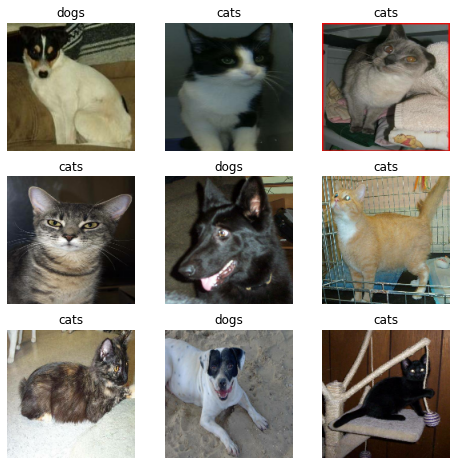

In [8]:
class_names = train_dataset.class_names
print(">>> class_names =", class_names)

plt.figure(figsize=(8, 8))
for image, label in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [9]:
val_batches = tf.data.experimental.cardinality(val_dataset)
print(
    ">>> val_batches_count =", val_batches
)
print(">>> = (dataset_size / batch_size) = ", 1000 / 32)

>>> val_batches_count = tf.Tensor(32, shape=(), dtype=int64)
>>> = (dataset_size / batch_size) =  31.25


In [10]:
TEST_SIZE = val_batches // 5

test_dataset = val_dataset.take(TEST_SIZE)
val_dataset = val_dataset.skip(TEST_SIZE)

print("val_dataset_size = {} ({})".format(
    tf.data.experimental.cardinality(val_dataset).numpy(),
    (tf.data.experimental.cardinality(val_dataset) / val_batches).numpy())
    
)
print("test_dataset_size = {} ({}%)".format(
    tf.data.experimental.cardinality(test_dataset).numpy(),
    (tf.data.experimental.cardinality(test_dataset) / val_batches))
)

val_dataset_size = 26 (0.8125)
test_dataset_size = 6 (0.1875%)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [12]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

first_image_shape = (160, 160, 3)
expand_dims_with_first_image = (1, 160, 160, 3)


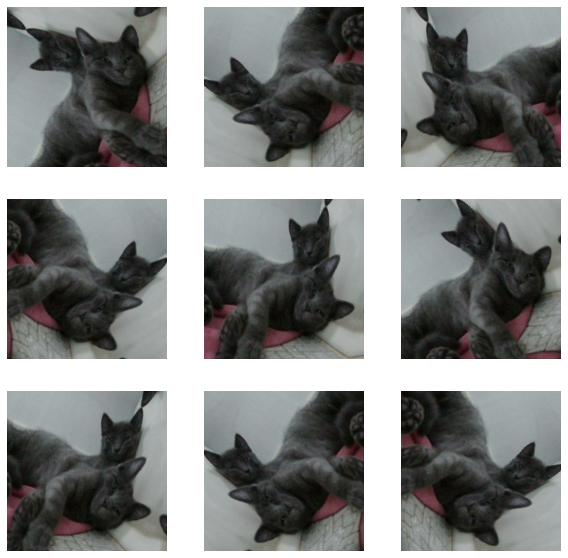

In [19]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    
    first_image = image[0]
    print("first_image_shape =", first_image.shape)
    
    print("expand_dims_with_first_image =",
        tf.expand_dims(first_image, 0).shape
    )
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        +
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [26]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [27]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(
    1./127.5, offset= -1
)

In [30]:
IMAGE_SHAPE = IMAGE_SIZE + (3, )
print(">>> image_shape =", IMAGE_SHAPE)

base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMAGE_SHAPE, include_top=False, weights='imagenet'
)

>>> image_shape = (160, 160, 3)
9420800/9406464 [==============================] - 0s 0us/step


In [32]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(">>> feature_batch_shape =", feature_batch.shape)

>>> feature_batch_shape = (32, 5, 5, 1280)


In [33]:
base_model.trainable = False

In [34]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________